### Extract palette from VanGogh Paintings
As the first step of Project_color, a database of popular palette is needed. One trivial way would be scraping this data from online sources. Alternatively, palette can be extracted from paintings by prestigeous artists. Data is obtained from Kaggle.

In [1]:
import cv2  #For image processing
import os   #Path
import numpy as np  #Munipulating image as array
import matplotlib.pyplot as plt
from collections import Counter #To find most prevalent color
from sklearn.cluster import KMeans  #Unsupervised image segmentation

%matplotlib inline

In [2]:
def read_img(i):
    """
    This function reads the corresponding image in the VanGogh folder and return an array
    """

    path = os.path.join(os.getcwd(),'Vincent_van_Gogh','Vincent_van_Gogh_{}.jpg'.format(i+1))
    image = cv2.imread(path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  #convert to correct color channel order
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)

    return modified_image

def get_palette(img,n=5):
    """
    This function is used to extract the palette for a given image array,
    5 most dominant colors will be returned as default.
    """

    clf = KMeans(n_clusters = 10)    #create KMeans model with n clusters
    labels = clf.fit_predict(img)   #get clustering results
    counts = Counter(labels)
    sorted_counts = sorted(counts, key=counts.get, reverse=True) #sort colors by prevalence
    center_colors = clf.cluster_centers_    #calculate the mean RGB code for each cluster, the center
    rgb_colors = [center_colors[i] for i in sorted_counts[:n]]    
    palette = np.array([rgb_colors])
    plt.imshow(palette.astype(int))
    plt.axis('off')
    plt.show()



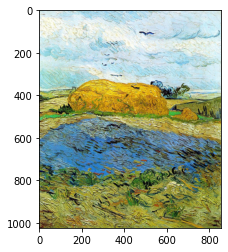

In [3]:
#Using 15th painting as an example
path = os.path.join(os.getcwd(),'Vincent_van_Gogh','Vincent_van_Gogh_15.jpg')
image = cv2.imread(path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

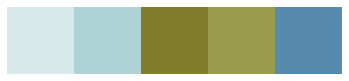

In [4]:
get_palette(read_img(14))

Qualitatively, the palette extraction is succesful. However, there are clear limitations. The bright yellow is averaged out because of the KMeans algorithm. Possible ways to improve the performance would be i) hyper-parameter tuning ( a larger number of clusters); ii) perform convolution (pooling) on the image before using Means. These methods are beyond the scope of this projects.

In the following section, a palette database is generated from all the paintings in the VanGogh folder, and the corresponding RGB codes are saved in a .txt file for future use. !!!The code will take quite a while to finish!!!

In [5]:

# def get_palette_code(img,n=5):
#     """
#     This function is used to extract the palette for a given image array,
#     RGBcode of the 5 most dominant colors will be returned as default.
#     """

#     clf = KMeans(n_clusters = 10)    #create KMeans model with n clusters
#     labels = clf.fit_predict(img)   #get clustering results
#     counts = Counter(labels)
#     sorted_counts = sorted(counts, key=counts.get, reverse=True) #sort colors by prevalence
#     center_colors = clf.cluster_centers_    #calculate the mean RGB code for each cluster, the center
#     rgb_colors = [center_colors[i].astype(int).tolist() for i in sorted_counts[:n]]    
#     return [tuple(l) for l in rgb_colors]


# VanGogh_palette = []
# for i in range(877):
#     VanGogh_palette.append(get_palette_code(read_img(i)))


# with open("VanGogh_palette.txt", "w") as f:
#     for item in VanGogh_palette:
#         f.write("%s\n" % item)
    


### Reference:
[1](https://towardsdatascience.com/color-identification-in-images-machine-learning-application-b26e770c4c71) This notebook is developed based on the method described by Karan Bhanot

[2](https://medium.com/pbsh/vangogh-ai-powered-color-palette-generator-57f4118fa62f) This notebook is inspired by Poobesh Gowtham
